In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img
from matplotlib.pyplot import imshow
from tensorflow.keras.callbacks import ReduceLROnPlateau
import shutil
from PIL import Image

In [3]:
for dirnames, _, filenames in os.walk('c'):
    print(dirnames)
    if len(filenames) > 0:
        print(f'Contains {len(filenames)} number of files')
        #print(filenames)

In [4]:
DIR = 'C:\\Users\\MSI GF63\\OneDrive\\Documents\\Folder Tugas\\SEMESTER 5\\MFDS\\Pertemuan 1\\mfds_data'

In [5]:
files = os.listdir(DIR)
print(files)
class_count = len(files)
print(f'There are {class_count} car model classes.')

['Anthracnose', 'Bacterial Canker', 'Cutting Weevil', 'Die Back', 'Gall Midge', 'Healthy', 'Powdery Mildew', 'Sooty Mould']
There are 8 car model classes.


In [6]:
# Remove Non JPG images
for cls in files:
    cls_path = os.path.join(DIR, cls)
    imgs =  os.listdir(cls_path)
    img = Image.open(os.path.join(cls_path,imgs[0]))
    print(f'Class {cls} contains {len(os.listdir(cls_path))} images of shape {img.size}.')

Class Anthracnose contains 500 images of shape (320, 240).
Class Bacterial Canker contains 500 images of shape (240, 320).
Class Cutting Weevil contains 500 images of shape (320, 240).
Class Die Back contains 500 images of shape (240, 240).
Class Gall Midge contains 500 images of shape (240, 320).
Class Healthy contains 500 images of shape (320, 240).
Class Powdery Mildew contains 500 images of shape (240, 240).
Class Sooty Mould contains 500 images of shape (240, 320).


In [7]:
filepaths=[]
labels=[]
classlist=os.listdir(DIR)
classlist.sort()
for klass in classlist:
    classpath=os.path.join(DIR, klass)
    flist=os.listdir(classpath)
    for f in flist:
        fpath=os.path.join(classpath,f)        
        filepaths.append(fpath)
        labels.append(klass)
    Fseries= pd.Series(filepaths, name='filepaths')
    Lseries=pd.Series(labels, name='labels') 
    data_df=pd.concat([Fseries, Lseries], axis=1)
data_df = data_df.sample(frac=1)

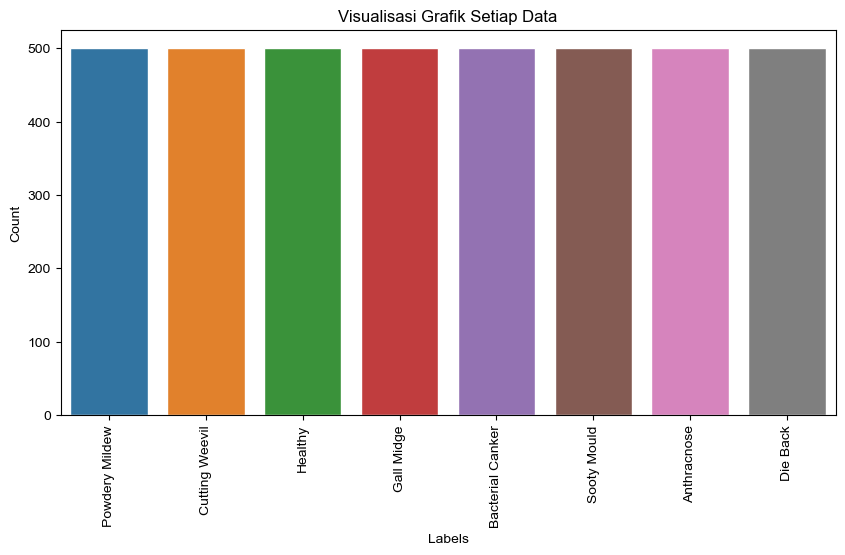

In [8]:
plt.figure(figsize=(10, 5))
plt.title('Visualisasi Grafik Setiap Data')
sns.set_style("white")
sns.barplot(x=data_df['labels'].value_counts().index, y=data_df['labels'].value_counts().values)

plt.xticks(rotation=90)  # Untuk memutar label x jika diperlukan
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

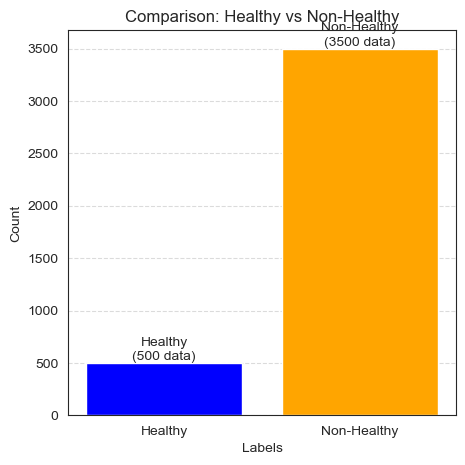

In [13]:
label_counts = data_df['labels'].value_counts()
healthy_count = label_counts.get("Healthy", 0)
other_count = len(data_df) - healthy_count
labels = ["Healthy", "Non-Healthy"]
data = [healthy_count, other_count]

# Menggunakan grafik batang
plt.figure(figsize=(5, 5))
plt.bar(labels, data, color=['blue', 'orange'])

# Menambahkan label data di atas batang
for i in range(len(data)):
    plt.text(labels[i], data[i], f'{labels[i]}\n({data[i]} data)', ha='center', va='bottom')

plt.title('Comparison: Healthy vs Non-Healthy')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()